# ANÁLISES GRID DE BEST ESTIMATOR

## IMPORTACIÓN DE PAQUETES

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Métricas de evaluación
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle

## IMPORTAR LOS DATOS

### CARGAR LOS DATOS

In [34]:
x = pd.read_pickle('../../02_Datos/03_Trabajo/x_preselecionado.pickle')
y = pd.read_pickle('../../02_Datos/03_Trabajo/y_preselecionado.pickle')

In [35]:
#variable_no = 'distance_station_mms'
#x = x.drop(columns= variable_no)

In [36]:
y.head(5)

0   37.90
1   42.20
2   47.30
3   54.80
4   46.70
Name: price, dtype: float64

In [37]:
# Hacemos el log de la target para reducir los atípicos.
y = np.log(y)

In [38]:
x_columns = list(x.columns)
y_target = y.name

## MODELIZAR

### RESERVAR EL DATASET DE VALIDACIÓN

In [39]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.2, random_state= 1)

### MODELIZAR CON LAZYPREDICT PARA VER MEJORES MODELOS

In [40]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(train_x, val_x, train_y, val_y)

print(models)

100%|██████████| 42/42 [00:01<00:00, 26.34it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 231, number of used features: 5
[LightGBM] [Info] Start training from score 3.560078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES

Optimizamos los algoritmos, parámetros y valores para los mejores modelos analizados en el lazypredict

#### Parámetros a testear:

In [41]:
pipe = Pipeline([('algoritmo', RandomForestRegressor())])

grid = [    {
                'algoritmo': [XGBRegressor()],
                'algoritmo__n_jobs': [-1],
                'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
                'algoritmo__max_depth': [5,10,20],
                'algoritmo__reg_alpha': [0,0.1,0.5,1],
                'algoritmo__reg_lambda': [0.01,0.1,1],
                'algoritmo__n_estimators': [100,500,1000]
            }
          ]

### OPTIMIZAR LOS HIPERPARÁMETROS

####  Con grid search

In [42]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 5, 
                           scoring = 'neg_mean_absolute_percentage_error',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__n_estimators,param_algoritmo__n_jobs,param_algoritmo__reg_alpha,param_algoritmo__reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
427,0.43,0.01,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.10,20,1000,-1,0.50,0.10,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.00,1
415,0.25,0.02,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.10,20,500,-1,0.50,0.10,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.00,1
347,0.21,0.00,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.10,5,500,-1,1,1,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.00,3
359,0.42,0.01,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.10,5,1000,-1,1,1,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.00,3
378,0.24,0.01,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.10,10,500,-1,0.50,0.01,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.04,0.00,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.01,5,100,-1,0,1,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.32,-0.32,-0.32,-0.31,-0.31,-0.32,0.00,427
38,0.05,0.00,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.01,10,100,-1,0,1,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.32,-0.32,-0.32,-0.31,-0.31,-0.32,0.00,427
47,0.05,0.00,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.01,10,100,-1,1,1,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.32,-0.32,-0.32,-0.31,-0.31,-0.32,0.00,430
11,0.03,0.00,0.00,0.00,"XGBRegressor(base_score=None, booster=None, ca...",0.01,5,100,-1,1,1,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.32,-0.32,-0.32,-0.31,-0.31,-0.32,0.00,430


In [43]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=20, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=500,
                              n_jobs=-1, num_parallel_tree=None, predictor=None,
                              random_state=None, ...))])

In [44]:
modelo.best_params_

{'algoritmo': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'algoritmo__learning_rate': 0.1,
 'algoritmo__max_depth': 20,
 'algoritmo__n_estimators': 500,
 'algoritmo__n_jobs': -1,
 'algoritmo__reg_alpha': 0.5,
 'algoritmo__reg_lambda': 0.1}

In [45]:
modelo.best_score_

-0.03814959201148519

### CREAR PICKLE DE MODELO.BEST_ESTIMATOR y PARÁMETROS

In [46]:
modelo_best_estimator = modelo

#### Guardamos modelo, parámetros y score

In [47]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### EVALUAR SOBRE EL TRAIN

In [48]:
pred = modelo.best_estimator_.predict(train_x)
t_mape = mean_absolute_percentage_error(train_y, pred)
t_coef_determinacion = r2_score(train_y,pred)
t_mae = mean_absolute_error(train_y, pred)
t_rmse =  mean_squared_error(train_y,pred,squared='False')

print("%mape:", t_mape )
print("Coeficiente de determinación:", t_coef_determinacion)
print("MAE:", t_mae)
print("RMSE:",t_rmse)


%mape: 0.017396773173370825
Coeficiente de determinación: 0.9564647678901494
MAE: 0.06065322540021562
RMSE: 0.006542384822516415


### PREDECIR SOBRE LA VALIDACIÓN

In [49]:
pred = modelo.best_estimator_.predict(val_x)

### EVALUAR SOBRE LA VALIDACIÓN

In [50]:
v_mape = mean_absolute_percentage_error(val_y, pred)
v_coef_determinacion = r2_score(val_y,pred)
v_mae = mean_absolute_error(val_y, pred)
v_rmse =  mean_squared_error(val_y,pred,squared='False')


print("%mape:", v_mape)
print("Coeficiente de determinación:", v_coef_determinacion)
print("MAE:", v_mae)
print("RMSE:", v_rmse)

%mape: 0.03323147403762966
Coeficiente de determinación: 0.806971088465949
MAE: 0.11771550489852446
RMSE: 0.026937838915858606


#### Gráfico entre la diferencia entre la validación y el original

In [51]:
test_y = val_y.reset_index().copy()
test_pred = pd.Series(pred).to_frame()
df_pred = pd.concat([test_y,test_pred], axis= 1).sort_values(by='price').reset_index()
df_pred.rename(columns = {0:'pred'}, inplace = True)
df_pred = df_pred.drop(columns= ['level_0'])
df_pred['dif'] = abs(df_pred['price']-df_pred['pred'])
# Diferencia entre predicción y validación
df_pred.sort_values(by = 'dif', ascending = False).head(10)

,index,price,pred,dif
55,85,4.14,3.54,0.60
15,225,3.29,3.77,0.47
57,272,4.22,3.83,0.38
3,132,3.02,2.67,0.35
46,62,3.87,3.56,0.31
0,179,2.62,2.86,0.23
32,282,3.70,3.91,0.21
6,150,3.04,3.24,0.20
22,18,3.51,3.70,0.19
54,230,4.13,3.95,0.18


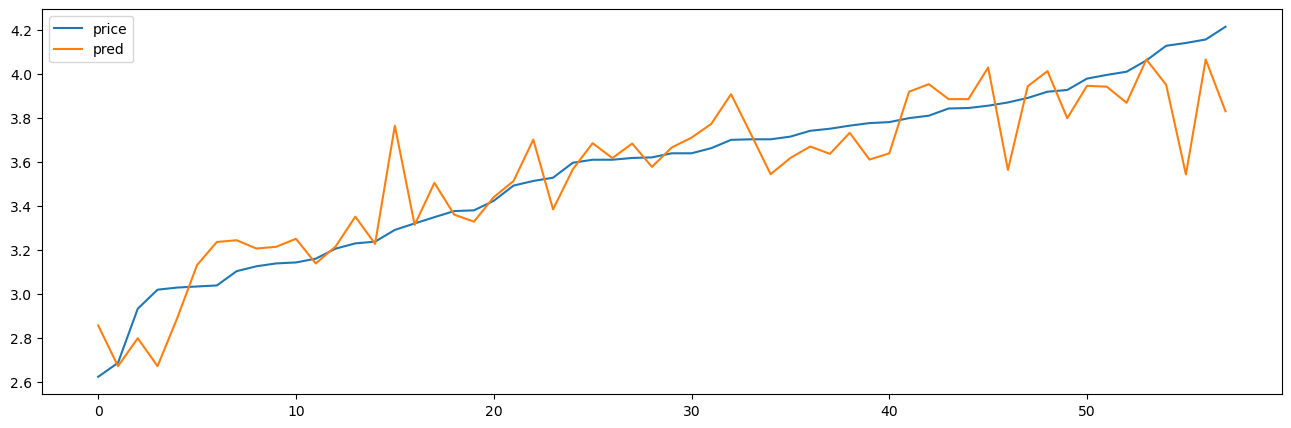

In [52]:
df_pred[['price','pred']].plot(figsize=(16,5));

## Gráficios de validación modelos de regresión

1. Gráfico de dispersión de valores reales vs. valores predichos: 

Este gráfico muestra los puntos de datos observados en un diagrama de dispersión, y superpone la línea de regresión que representa la relación lineal ajustada por el modelo. Puedes utilizar este gráfico para evaluar visualmente cómo se ajusta la línea de regresión a los datos observados.

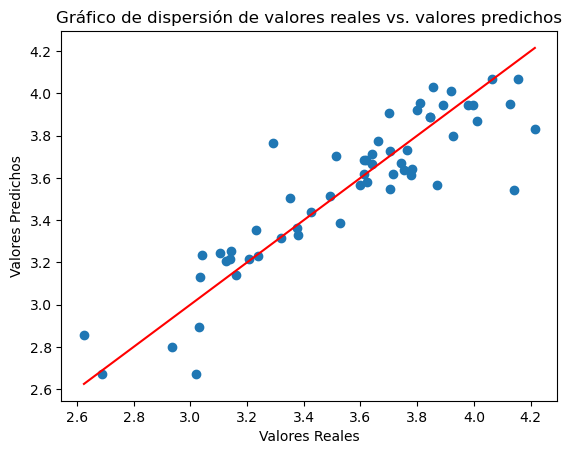

In [53]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# y = target: Valores reales
# pred - predicción: Valores predichos por el modelo

plt.scatter(val_y, pred)
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')  # Línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de dispersión de valores reales vs. valores predichos')
plt.show()


2. Gráfico de residuos vs. valores predichos: 


Un gráfico de residuos muestra los residuos (diferencias entre los valores observados y los valores predichos por el modelo) en función de los valores ajustados o las variables independientes. Este gráfico puede ayudarte a verificar si los residuos tienen algún patrón sistemático, como una relación no lineal o una heterocedasticidad.

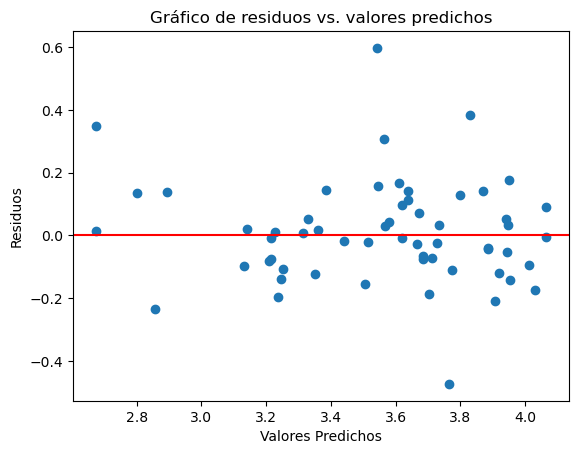

In [54]:
residuos = val_y - pred

plt.scatter(pred, residuos)
plt.axhline(y=0, color='red')  # Línea horizontal en cero
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores predichos')
plt.show()


3. Histograma de residuos:

 Este gráfico muestra la distribución de los residuos del modelo. Puedes utilizar un histograma o un gráfico de densidad para visualizar cómo se distribuyen los residuos y verificar si siguen una distribución aproximadamente normal.

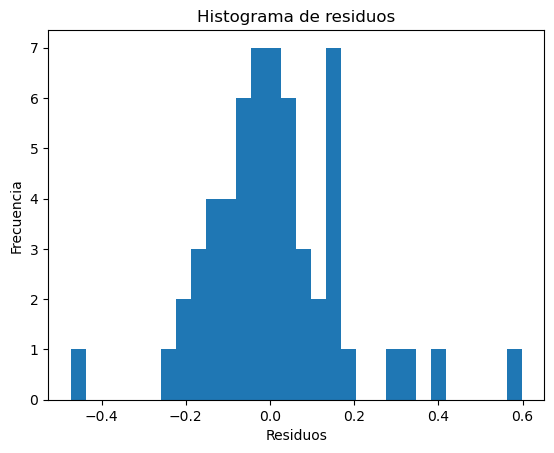

In [55]:
plt.hist(residuos, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

4. Gráfico de Q-Q (cuantil-cuantil):

Este gráfico compara los cuantiles de los residuos con los cuantiles esperados de una distribución normal. Puede ayudarte a evaluar si los residuos siguen una distribución normal.

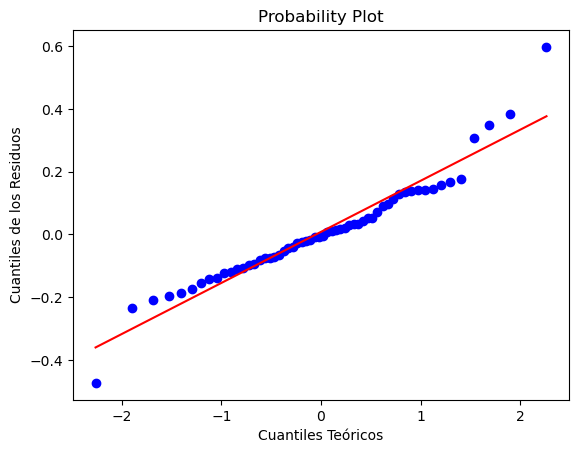

In [56]:
import scipy.stats as stats

stats.probplot(residuos, dist="norm", plot=plt)
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuos')
plt.show()


5. Gráfico de influencia:

Un gráfico de influencia muestra la influencia de cada observación en el ajuste del modelo. Puede ayudarte a identificar puntos atípicos o valores influyentes que pueden tener un impacto significativo en los resultados de la regresión.

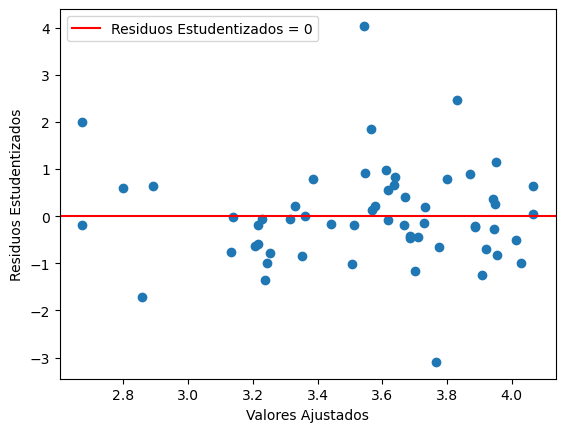

In [57]:
import statsmodels.api as sm

infl = sm.OLS(val_y, sm.add_constant(pred)).fit().get_influence()
residuos_estudentizados = infl.resid_studentized_external

plt.scatter(pred, residuos_estudentizados)
plt.axhline(y=0, color='r', linestyle='-', label='Residuos Estudentizados = 0')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estudentizados')
plt.legend()
plt.show()

# GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [58]:
version_estimator = '_v09'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'XGBRegressor_v09.pickle'

In [59]:
m_best_estimator

'XGBRegressor'

In [60]:
ruta_pipe_entrenamiento = '../../04_Modelos/01_Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


### Guardar la información del estimador

In [61]:
# Añadir comentarios sobre el modelo

comentarios = "Cambiamos a XGBoost"


In [62]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_%mape': t_mape, 
               't_Coef._determinacion': t_coef_determinacion, 
               't_mae': t_mae, 
               't_rmse': t_rmse, 
               'v_%mape':  v_mape, 
               'v_Coef._determinacion': v_coef_determinacion, 
               'v_mae': v_mae, 
               'v_rmse': v_rmse,
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                              XGBRegressor
m_Best_paramans          {'algoritmo': XGBRegressor(base_score=None, bo...
m_Best_Score                                          -0.03814959201148519
t_%mape                                                               0.02
t_Coef._determinacion                                                 0.96
t_mae                                                                 0.06
t_rmse                                                                0.01
v_%mape                                                               0.03
v_Coef._determinacion                                                 0.81
v_mae                                                                 0.12
v_rmse                                                                0.03
comentarios                                            Cambiamos a XGBoost
predictoras_X            [distance_station_mms, latitude_mms, stores_mm...
target_y                 

In [63]:
df_best = pd.read_excel('../../04_Modelos/01_Best_estimator/Best_estimator.xlsx',index_col=0)


In [64]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/01_Best_estimator/Best_estimator.xlsx')